<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_12356_army_buddies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 12356 - Army Buddies

**@PDF: [UVA 12356 - Army Buddies](https://onlinejudge.org/external/123/12356.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

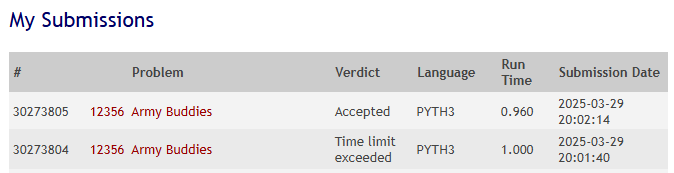

Nlogonia is fighting a ruthless war against the neighboring country of Cubiconia.
The Chief General of Nlogonia's Army decided to attack the enemy with a linear formation of soldiers, that would advance together until conquering the neighboring country.
Before the battle, the Chief General ordered that each soldier in the attack line, besides protecting himself and attacking, should also protect his two (nearest) neighbors in the line, one to his left and one to his right.
The Chief General told the soldiers that for each of them, his "buddies" would be these two neighbors, if such neighbors existed (because the leftmost soldier does not have a left neighbor and the rightmost soldier does not have a right neighbor).
The Chief General also told the soldiers that protecting their buddies was very important to prevent the attack line from being broken.
So important that, if the left or right buddy of a soldier is killed, then the next living neighbor to the left or to the right of the soldier, respectively, should become his buddy.

The battle is fierce, and many soldiers in the attack line are being killed by fire shots, grenades and bombs.
But following the Chief General's orders, immediately after knowing about losses in the attack line, the Army's information systems division has to inform the soldiers who their new buddies are.

You are given the number of soldiers in the attack line, and a sequence of loss reports.
Each loss report describes a group of contiguous soldiers in the attack line that were just killed in the battle.
Write a program that, for each loss report, prints the new buddies formed.

## Input

Each test case is described using several lines. The first input line contains two integers S and B representing respectively the number of soldiers in the attack line, and the number of loss reports $(1 \le B \le S \le 10^{5})$. Soldiers are identified by different integers from 1 to S, according to their positions in the attack line, being 1 the leftmost soldier and S the rightmost soldier.
Each of the next B input lines describes a loss report using two integers L (left) and R (right), meaning that soldiers from L to R were killed $(1 \le L \le R \le S)$. You may assume that until that moment those soldiers were alive and were just killed.

The last test case is followed by a line containing two zeros.

## Output

For each test case output B+1 lines.
In the i-th output line write the new buddies formed by removing from the attack line the soldiers that were just killed according to the i-th loss report.
That is, for the loss report 'L R', print the first surviving soldier to the left of L, and the first surviving soldier to the right of R. For each direction, print the character '*' (asterisk) if there is no surviving soldier in that direction.
Print a line containing a single character '-' (hyphen) after each test case.

## Sample Input
```
1 1
1 1
10 4
2 5
6 9
1 1
10 10
5 1
1 1
0 0
```

## Sample Output

```
* *
-
1 6
1 10
* 10
* *
-
* 2
-
```

In [ ]:
import time
from sys import stdin, stdout

next_array = [i for i in range(1, 100000 + 2)]
prev_array = [i for i in range(-1, 100000) ]
prev_array[0] = -1

while True:
  n, q = list(map(int, stdin.readline().strip().split()))

  if n == q == 0:
    break

  for i in range(1, n+1):
    next_array[i] = i + 1
    prev_array[i] = i - 1
  next_array[n] = -1

  for j in range(q):
    start, end = list(map(int, stdin.readline().strip().split()))

    # kill soldiers in range start, end
    prev = prev_array[start]
    nex = next_array[end]

    if prev > 0:
      next_array[prev] = next_array[end]

    if nex > 0:
      prev_array[nex] = prev_array[start]

    stdout.write("{} {}\n".format(prev_array[start] if prev > 0 else "*", next_array[end] if nex > 0 else "*"))
  stdout.write("-\n")

Commented Code

In [ ]:
# Import necessary modules for efficient I/O
# Note: 'time' module was imported but not used, so it's removed.
from sys import stdin, stdout

# --- Data Structure Initialization ---
# We use two arrays to simulate a doubly linked list where array indices
# represent the soldiers (1-based indexing).
# 'next_array[i]' stores the index (soldier number) of the soldier immediately
# to the right of soldier 'i'.
# 'prev_array[i]' stores the index (soldier number) of the soldier immediately
# to the left of soldier 'i'.
# We allocate slightly larger arrays (100000 + 2) to comfortably handle
# 1-based indexing up to N=100000 and potentially use index 0 or N+1 as sentinels,
# although the code primarily uses -1 or checks > 0.

# Pre-allocate arrays to maximum possible size for efficiency if multiple test cases run.
# Initial values are somewhat arbitrary before the per-test-case reset.
next_array = [i for i in range(1, 100000 + 2)]
prev_array = [i for i in range(-1, 100000) ]
# Explicitly setting prev_array[0] = -1 might be a sentinel value convention.
prev_array[0] = -1

# --- Main Loop for Test Cases ---
while True:
    # Read number of soldiers (N) and number of queries (Q)
    # Use stdin.readline().strip().split() for faster input reading
    n, q = list(map(int, stdin.readline().strip().split()))

    # Termination condition for the online judge
    if n == 0 and q == 0:
        break

    # --- Re-initialize the Linked List for the current test case ---
    # Complexity: O(N) - Necessary for each test case.
    # Set up the initial line of soldiers from 1 to N.
    for i in range(1, n + 1):
        next_array[i] = i + 1  # Soldier i's right neighbor is i+1
        prev_array[i] = i - 1  # Soldier i's left neighbor is i-1

    # Define list boundaries:
    # The soldier to the left of soldier 1 doesn't exist (represented by prev_array[1] = 0).
    # The soldier to the right of soldier N doesn't exist. We use -1 as a sentinel value.
    # Note: prev_array[1] was set to 0 in the loop above.
    next_array[n] = -1 # Sentinel indicating no soldier to the right of N

    # --- Process Queries ---
    # Complexity: O(Q) total for this loop, as each query is O(1).
    for _ in range(q): # Use '_' as variable name since loop counter 'j' wasn't used
        # Read the start and end of the range of soldiers to be removed.
        start, end = list(map(int, stdin.readline().strip().split()))

        # --- Core Logic: Simulate Removal using Linked List Pointers ---
        # Find the neighbours *outside* the range [start, end] *before* the removal.
        # 'prev' will be the soldier to the left of 'start'.
        # 'nex' will be the soldier to the right of 'end'.
        # Array lookups provide O(1) access to these neighbours.
        prev = prev_array[start]
        nex = next_array[end]

        # --- Update Links to "Remove" the Range [start, end] ---
        # This is the key O(1) operation for range removal.
        # We make 'prev' point directly to 'nex', and 'nex' point back to 'prev',
        # effectively bypassing all soldiers from 'start' to 'end'.

        # If there *is* a soldier to the left of 'start' (prev > 0),
        # update its 'next' pointer to skip the removed segment.
        if prev > 0:
            next_array[prev] = nex # The soldier after 'prev' is now 'nex'.

        # If there *is* a soldier to the right of 'end' (nex > 0, using -1 as sentinel),
        # update its 'prev' pointer to skip the removed segment.
        # Note: The original code uses 'nex > 0'. If -1 is the only sentinel,
        # 'nex != -1' might be slightly clearer, but 'nex > 0' works for 1-based indexing.
        if nex > 0: # Check assumes soldier indices are always positive.
            prev_array[nex] = prev # The soldier before 'nex' is now 'prev'.

        # --- Output Results ---
        # Report the neighbours found *before* the links were updated.
        # Use stdout.write for potentially faster output.
        # Print '*' if a neighbour doesn't exist (i.e., if prev <= 0 or nex <= 0).
        # The condition `prev > 0` checks if `prev` is a valid soldier index (1 to N).
        # The condition `nex > 0` checks if `nex` is a valid soldier index (1 to N).
        left_buddy = str(prev) if prev > 0 else "*"
        right_buddy = str(nex) if nex > 0 else "*" # Again, check assumes positive soldier index means existence.
        stdout.write("{} {}\n".format(left_buddy, right_buddy))

    # Print the required separator after each test case's output.
    stdout.write("-\n")